# Tabular Playground Series May 2022

In [1]:
# Required modules

import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb

from xgboost import XGBClassifier

from zipfile import ZipFile
from matplotlib import pyplot as plt

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
# Config

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 12)

Before running the below cell, upload your kaggle token, to make sure an error doesn't popup.

In [3]:
# Create kaggle folder

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
# Test the command

!kaggle competitions download -c tabular-playground-series-may-2022

tabular-playground-series-may-2022.zip: Skipping, found more recently modified local copy (use --force to force download)


In [51]:
# Extract the zip file

with ZipFile('/content/tabular-playground-series-may-2022.zip', 'r') as zf:
    zf.extractall('./')

## Loading the data

In [5]:
# Load the data

train = pd.read_csv('train.csv', index_col='id')
train.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
id,,,,,,,,,,,,,,,,,,,,,
0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,1,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,4,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,2,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,1,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,0,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1


In [6]:
# Inspecting the data

train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900000 entries, 0 to 899999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   f_00    900000 non-null  float64
 1   f_01    900000 non-null  float64
 2   f_02    900000 non-null  float64
 3   f_03    900000 non-null  float64
 4   f_04    900000 non-null  float64
 5   f_05    900000 non-null  float64
 6   f_06    900000 non-null  float64
 7   f_07    900000 non-null  int64  
 8   f_08    900000 non-null  int64  
 9   f_09    900000 non-null  int64  
 10  f_10    900000 non-null  int64  
 11  f_11    900000 non-null  int64  
 12  f_12    900000 non-null  int64  
 13  f_13    900000 non-null  int64  
 14  f_14    900000 non-null  int64  
 15  f_15    900000 non-null  int64  
 16  f_16    900000 non-null  int64  
 17  f_17    900000 non-null  int64  
 18  f_18    900000 non-null  int64  
 19  f_19    900000 non-null  float64
 20  f_20    900000 non-null  float64
 21  f_21    90

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30,target
count,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,...,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000
mean,-0.000286,0.001165,0.001174,-0.001368,-0.000571,0.000284,-0.000709,2.031460,2.057998,2.362431,...,-0.156307,-0.009273,-0.369459,-0.342738,0.176549,0.357591,-0.380876,0.345661,1.002654,0.486488
std,0.998888,0.999193,1.000514,1.000175,1.000167,0.999875,0.999942,1.656172,1.590955,1.637706,...,2.484706,2.450797,2.453405,2.386941,2.416959,2.476020,238.773054,0.475584,0.818989,0.499818
min,-4.599856,-4.682199,-4.642676,-4.658816,-4.748501,-4.750214,-4.842919,0.000000,0.000000,0.000000,...,-13.310146,-11.853530,-12.301097,-11.416189,-11.918306,-14.300577,-1229.753052,0.000000,0.000000,0.000000
25%,-0.675490,-0.675162,-0.674369,-0.676114,-0.675909,-0.673437,-0.674876,1.000000,1.000000,1.000000,...,-1.820063,-1.645585,-2.019739,-1.955956,-1.440424,-1.261598,-159.427418,0.000000,0.000000,0.000000
50%,0.001144,0.002014,0.002218,-0.002227,-0.001662,-0.000438,-0.001492,2.000000,2.000000,2.000000,...,-0.152668,0.030850,-0.390966,-0.340746,0.160912,0.404212,-0.519808,0.000000,1.000000,0.000000
75%,0.674337,0.675021,0.677505,0.672544,0.673789,0.675028,0.674749,3.000000,3.000000,3.000000,...,1.507071,1.661676,1.255408,1.266673,1.795928,2.028219,158.987357,1.000000,2.000000,1.000000
max,4.749301,4.815699,4.961982,4.454920,4.948983,4.971881,4.822668,15.000000,16.000000,14.000000,...,14.455426,11.344080,12.247100,12.389844,12.529179,12.913041,1229.562577,1.000000,2.000000,1.000000


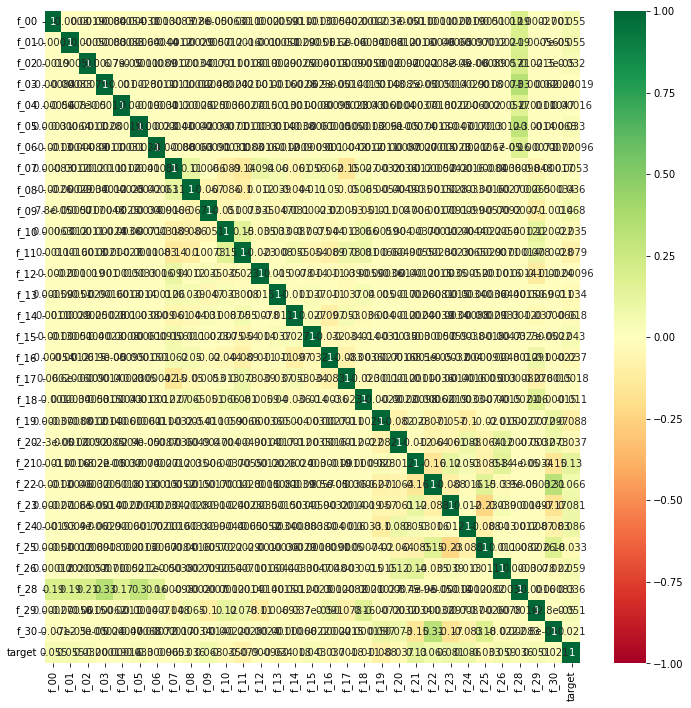

In [7]:
# Correlation matrix

sns.heatmap(train.corr(), annot=True, vmin=-1, vmax=1, cmap='RdYlGn')

In [8]:
# Load the data

test = pd.read_csv('test.csv', index_col='id')
test.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30
id,,,,,,,,,,,,,,,,,,,,,
900000,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,0,...,-1.006400,-1.193879,-2.435736,-2.427430,-1.966887,5.734205,BAAABADLAC,99.478419,0,0
900001,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,4,...,2.382405,0.149442,1.883322,-2.848714,-0.725155,3.194219,AFABBAEGCB,-65.993825,1,0
900002,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3,3,4,...,-7.026098,1.312277,-5.157192,1.714005,0.585032,0.066898,BBACABBKEE,-87.405622,0,1
900003,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0,0,4,...,-0.594532,-3.939475,1.754570,-2.364007,-1.003320,3.893099,AEBEAACQCC,-281.293460,0,0
900004,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2,2,2,...,0.084906,-0.985736,-0.130467,-3.557893,1.210687,1.861884,AEBBBBDABF,25.629415,0,2


There are no missing values, in the data.

In [9]:
# Missing values

if train.isna().any().any():
    print(train.isna().sum()/train.shape[0])
else:
    print("No Missing values")

No Missing values


## Preparation

In [10]:
# Feature Engineering
# Some of the feature engineering functions are from here
# https://www.kaggle.com/code/slythe/super-lightgbm-w-feature-engineering#%F0%9F%8C%9F-Feature-Engineering-%F0%9F%8C%9F

def text_engineering(df, col):
    # Adding the characters unicode value, unique characters and there length

    for i in range(10):
        df[f"{col}_{i}"] = df[col].apply(lambda x: ord(x[i]) - ord('A'))
        df["unique_chars"] = df[col].apply(lambda x: "".join(set(x)))
        df["unique_chars"] = df["unique_chars"].astype("category")
        df["unique_length"] = df["unique_chars"].apply(lambda x: len(x))

    return df

def group_central_stats(df, cols, suffix):
    df[f"sum_{suffix}"] = df[cols].sum(axis=1)
    df[f"mean_{suffix}"] = df[cols].mean(axis=1)
    df[f"std_{suffix}"] = df[cols].std(axis=1)
    df[f"min_{suffix}"] = df[cols].min(axis=1)
    df[f"max_{suffix}"] = df[cols].max(axis=1)
    df[f"median_{suffix}"] = df[cols].median(axis=1)
    df[f"mad_{suffix}"] = df[cols].mad(axis=1)
    
    df[f"range_{suffix}"] = df[cols].max(axis=1) - df[cols].min(axis=1)
    df[f"q01_{suffix}"] = df[cols].quantile(q=0.01, axis=1)
    df[f"q05_{suffix}"] = df[cols].quantile(q=0.05, axis=1)
    df[f"q25_{suffix}"] = df[cols].quantile(q=0.25, axis=1) 
    df[f"q50_{suffix}"] = df[cols].quantile(q=0.5, axis=1) 
    df[f"q75_{suffix}"] = df[cols].quantile(q=0.75, axis=1) 
    df[f"q95_{suffix}"] = df[cols].quantile(q=0.95, axis=1) 
    df[f"q99_{suffix}"] = df[cols].quantile(q=0.99, axis=1)
    df[f"kurt_{suffix}"] = df[cols].kurt(axis=1) 
    df[f"skew_{suffix}"] = df[cols].skew( axis=1)
    
    return df

def feature_engineering(df):
    col = 'f_27'
    group_floats1 = [f"f_0{i}" for i in range(7)]
    group_floats2 = [f"f_{i}" for i in range(19, 27)]

    df = text_engineering(df, col)
    df = group_central_stats(df, group_floats1, "g1")
    df = group_central_stats(df, group_floats2, "g2")

    return df

In [11]:
# Important functions

def reduce_memory_dataframe(df, verbose=True):
    # Reduce the DataFrame's Memory by altering the data types of the columns
    
    num_types = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_memory = df.memory_usage().sum()
    
    for col in df.columns:
        if df[col].dtypes in num_types:
            c_min = df[col].min()
            c_max = df[col].max()
            
            if str(df[col].dtype).find('int') != 1:
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                elif c_min > np.finfo(np.float64).min and c_max < np.finfo(np.float64).max:
                    df[col] = df[col].astype(np.float64)
                    
    end_memory = df.memory_usage().sum()
    
    if verbose:
        print(f"Memory Reduced by {round((start_memory - end_memory) / start_memory, 2)} from {start_memory} to {end_memory}")
        
    return df

In [12]:
# Increase the feature space

train = feature_engineering(train)
test = feature_engineering(test)

In [13]:
# Reduce the memory of the training and test sets

train = reduce_memory_dataframe(train)
test = reduce_memory_dataframe(test)

Memory Reduced by 0.85 from 563566432 to 85666432
Memory Reduced by 0.85 from 432764624 to 65964624


In [14]:
# Seperating out features and labels

X = train.drop(['target'], axis=1)
y = train['target']

In [15]:
# Dropping Categorical column

X.drop(['f_27', 'unique_chars'], axis=1, inplace=True)
test.drop(['f_27', 'unique_chars'], axis=1, inplace=True)

In [16]:
# Splitting the data

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=88)

## Modelling

### Approach-1



Just Apply a normal Random Forest Ensemble to the data.

In [42]:
# Fitting a model

model = RandomForestClassifier(n_estimators=300, verbose=2, n_jobs=-1)
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.3min


building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300
building tree 44 of 300
building tree 45 of 300
building tree 46 of 300
building tree 47 of 300
building tree 48 of 300
building tree 49 of 300
building tree 50 of 300
building tree 51 of 300
building tree 52 of 300
building tree 53 of 300
building tree 54 of 300
building tree 55 of 300
building tree 56 of 300
building tree 57 of 300
building tree 58 of 300
building tree 59 of 300
building tree 60 of 300
building tree 61 of 300
building tree 62 of 300
building tree 63 of 300
building tree 64 of 300
building tree 65 of 300
building tree 66 of 300
building tree 67 of 300
building tree 68 of 300
building tree 69 of 300
building tree 70 of 300
building tree 71 of 300
building tree 72 of 300
building tree 73 of 300
building tree 74 of 300
building tree 75 of 300
building tree 76 of 300
building tree 77 of 300
building tree 78 of 300
building tree 79 of 300
building tree 80

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  8.9min


building tree 160 of 300
building tree 161 of 300
building tree 162 of 300
building tree 163 of 300
building tree 164 of 300
building tree 165 of 300
building tree 166 of 300
building tree 167 of 300
building tree 168 of 300
building tree 169 of 300
building tree 170 of 300
building tree 171 of 300
building tree 172 of 300
building tree 173 of 300
building tree 174 of 300
building tree 175 of 300
building tree 176 of 300
building tree 177 of 300
building tree 178 of 300
building tree 179 of 300
building tree 180 of 300
building tree 181 of 300
building tree 182 of 300
building tree 183 of 300
building tree 184 of 300
building tree 185 of 300
building tree 186 of 300
building tree 187 of 300
building tree 188 of 300
building tree 189 of 300
building tree 190 of 300
building tree 191 of 300
building tree 192 of 300
building tree 193 of 300
building tree 194 of 300
building tree 195 of 300
building tree 196 of 300
building tree 197 of 300
building tree 198 of 300
building tree 199 of 300


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 16.6min finished


RandomForestClassifier(n_estimators=300, n_jobs=-1, verbose=2)

### Approach-2

Just Apply a normal Random Forest Ensemble to the data.

In [20]:
# Fitting the model

model = lgb.LGBMClassifier(
    objective= 'binary',
    metric= "auc",
    num_iterations = 5000,
    num_threads= -1,
    learning_rate= 0.18319492258552644,
    boosting= 'gbdt',
    lambda_l1= 0.00028648667113792726,
    lambda_l2= 0.00026863027834978876,
    num_leaves= 229,
    max_depth= 0,
    min_child_samples=80,
    max_bins=511, 
    random_state=42 
)
model.fit(X_train,y_train, eval_set=[(X_valid, y_valid)], callbacks = [lgb.early_stopping(30)],eval_metric="auc")

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.8203
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.882481
[3]	valid_0's auc: 0.894322
[4]	valid_0's auc: 0.901741
[5]	valid_0's auc: 0.913209
[6]	valid_0's auc: 0.917406
[7]	valid_0's auc: 0.920175
[8]	valid_0's auc: 0.927582
[9]	valid_0's auc: 0.929363
[10]	valid_0's auc: 0.93352
[11]	valid_0's auc: 0.935097
[12]	valid_0's auc: 0.938792
[13]	valid_0's auc: 0.941911
[14]	valid_0's auc: 0.944798
[15]	valid_0's auc: 0.945886
[16]	valid_0's auc: 0.94801
[17]	valid_0's auc: 0.949103
[18]	valid_0's auc: 0.949821
[19]	valid_0's auc: 0.951012
[20]	valid_0's auc: 0.951664
[21]	valid_0's auc: 0.953079
[22]	valid_0's auc: 0.953971
[23]	valid_0's auc: 0.954947
[24]	valid_0's auc: 0.956088
[25]	valid_0's auc: 0.9567
[26]	valid_0's auc: 0.957072
[27]	valid_0's auc: 0.957583
[28]	valid_0's auc: 0.958418
[29]	valid_0's auc: 0.959088
[30]	valid_0's auc: 0.960078
[31]	valid_0's auc: 0.96061
[32]	valid_0's auc: 0.960955
[33]	valid_0's auc: 0.9621

LGBMClassifier(boosting='gbdt', lambda_l1=0.00028648667113792726,
               lambda_l2=0.00026863027834978876,
               learning_rate=0.18319492258552644, max_bins=511, max_depth=0,
               metric='auc', min_child_samples=80, num_iterations=5000,
               num_leaves=229, num_threads=-1, objective='binary',
               random_state=42)

In [21]:
# Evaluation

print("Train Score", roc_auc_score(model.predict(X_train), y_train))
print("Valid Score", roc_auc_score(model.predict(X_valid), y_valid))

Train Score 0.9826676373940219
Valid Score 0.9266526138270555


In [22]:
# Getting the final predictions

test_preds = model.predict_proba(test)[:, 1]

In [23]:
# Generating output file

submission = pd.read_csv('/content/sample_submission.csv')
submission['target'] = test_preds
submission.to_csv('output.csv', index=False)

In [24]:
# Submission

!kaggle competitions submit -c tabular-playground-series-may-2022 -f output.csv -m "LGB heavy feature engineered"

100% 18.5M/18.5M [00:04<00:00, 3.94MB/s]
Successfully submitted to Tabular Playground Series - May 2022

AUC ROC is: 0.97941